In [14]:
import pandas as pd
import os
import matplotlib.pylab as plt 
import argparse
import matplotlib as mpl
import numpy as np
from matplotlib.ticker import MaxNLocator


In [15]:

files = {'n_meas = 5' : "./d20221121/d20221121_162030_2dscan/d20221121_162030_2dscan.csv",
        'n_meas = 10': "./d20221121/d20221121_163956_2dscan/d20221121_163956_2dscan.csv",
        'n_meas = 20': "./d20221121/d20221121_171929_2dscan/d20221121_171929_2dscan.csv"
        }



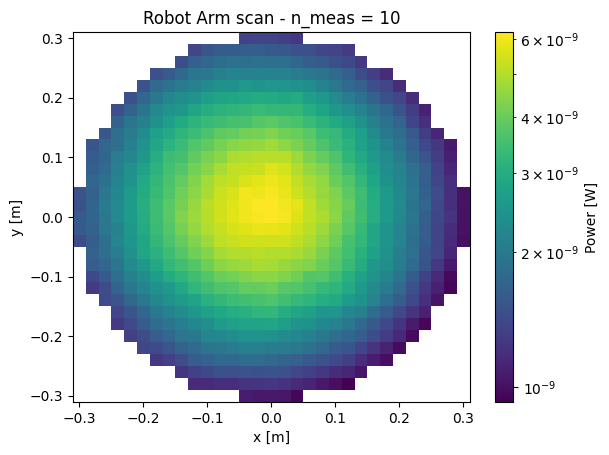

In [16]:
fig, ax = plt.subplots()
me  = 10
filename = files[f"n_meas = {me}"]
d=pd.read_csv(filename, comment = "#")
#name = filename.strip("./d.csv")
h, x, y, image = ax.hist2d(d['xreal'],d['yreal'],bins= np.linspace(-0.30 - 0.02/2, 0.30 + 0.02/2,32),weights=d['power'],norm=mpl.colors.LogNorm())
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
plt.title(f"Robot Arm scan - n_meas = {me}")
plt.colorbar(image, ax = ax, label = "Power [W]")
plt.savefig(os.path.join(f"n_meas_{me}_power_map"))
plt.show()

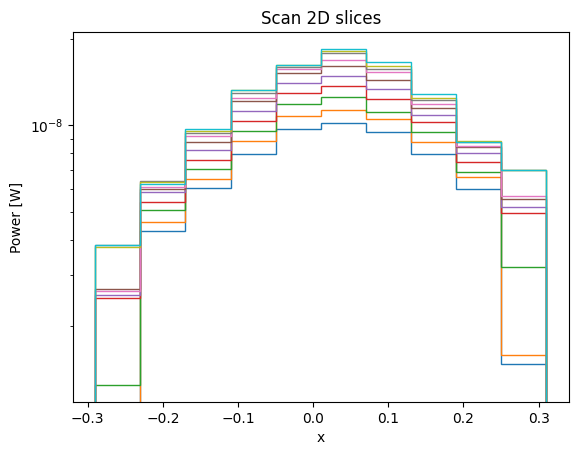

In [17]:
fig1, ax1 = plt.subplots()
yslices = np.arange(5,15,1)
for i in yslices:
    ax1.hist(x[1::], weights = h[1::][i], histtype="step", label = f"y = {i}")
    ax1.set_xlabel("x")
    ax1.set_ylabel("Power [W]")
    ax1.set_yscale("log")
    plt.title(f"Scan 2D slices")
plt.show() 

In [18]:
from scipy.optimize import curve_fit

# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y


5.774718084569058e-09 29.25612038573374
5.767083799549814e-09 29.646863817904016
5.76681696032481e-09 29.442843760661802


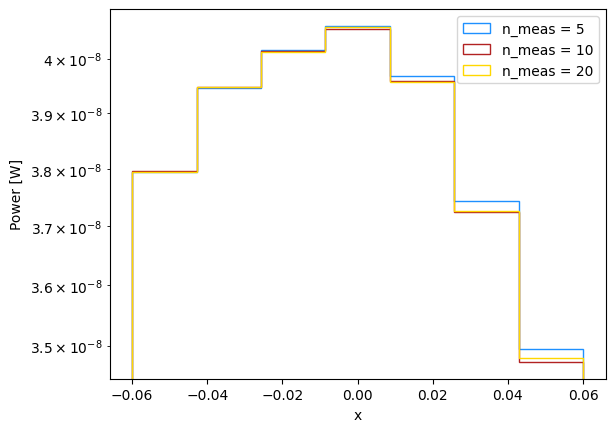

In [19]:
#fig, ax = plt.subplots()
fig1, ax1 = plt.subplots()
c = ["dodgerblue", "firebrick", "gold"]

k = 0
for i in files.keys():
    filename = files[i]
    powe = []
    x = []
    y = []
    d =pd.read_csv(filename, comment = "#")
    for j in range(len(d["x"])):
        if (d["y"][j] > -0.075 and d["y"][j] <0.075) and (d["x"][j] > -0.075 and d["x"][j] <0.075):
        #if (d["y"][j] > -0.1 and d["y"][j] <0.1) and (d["x"][j] > -0.1 and d["x"][j] <0.1):
            x.append(d["x"][j])
            y.append(d["x"][j])

            powe.append(d["power"][j])
    parameters, covariance = curve_fit(Gauss, x, powe)
  
    fit_A = parameters[0]
    fit_B = parameters[1]
    print(fit_A, fit_B)
    f = np.multiply(x, x)
    #fit_y = Gauss(x, fit_A, fit_B)
    #plt.plot(x, pow, 'o', label='data')
    #ax1.plot(x, fit_A*np.exp(-1*fit_B*f), '--', label='fit')
 
    ax1.hist(x, weights = powe, histtype="step", label = i, color = c[k], bins = 7)


    #xma = np.ma.masked_outside(d["x"], - 0.05, 0.05)   
    #yma = np.ma.masked_outside(d["y"], - 0.05, 0.05)

  
    #n = 14
    #h, x, y, image = ax.hist2d(d['xreal'],d['yreal'],bins= np.linspace(-0.30 - 0.02/2, 0.30 + 0.02/2,32),weights=d['power'],norm=mpl.colors.LogNorm())
    
    #xma = np.ma.masked_outside(x[1::], - 0.05,0.05)
   
    #yma = np.ma.masked_outside(y[1::], - 0.05,0.05)
    
    #ax1.hist(x[1::], weights = h[1::][n], histtype="step", label = i, color = c[k], bins = 10)
    k += 1

ax1.set_xlabel("x")
ax1.set_ylabel("Power [W]")
ax1.set_yscale("log")
#plt.title(f"Hist2D slice: y = {n}")
plt.legend()
#plt.savefig(os.path.join(f"slices_y_{n}"))

plt.show() 

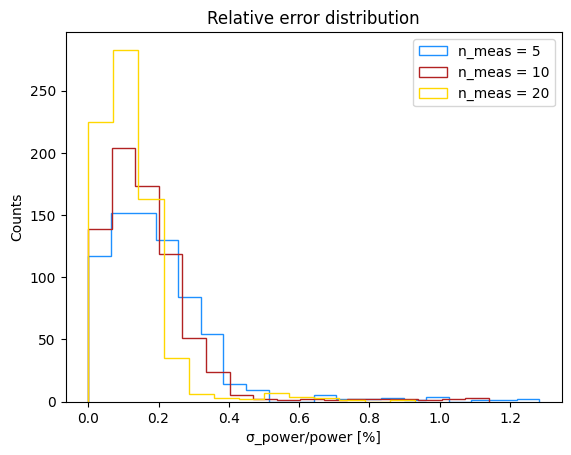

In [20]:
fig, ax = plt.subplots()
c = ["dodgerblue", "firebrick", "gold"]
k = 0
for file in files.keys():
    d=pd.read_csv(files[file], comment = "#")
    p_min = np.amin(d["err_power"])
    p_max = np.amax(d["err_power"])
    rel_err = 100*d["err_power"]/d["power"]
    plt.hist(rel_err, bins = int(abs(p_max-p_min)*1e11*10), label = file, histtype="step", color = c[k])
    k += 1
ax.set_xlabel("\u03C3_power/power [%]")
ax.set_ylabel("Counts")

plt.title("Relative error distribution")
plt.legend()
plt.savefig(os.path.join(f"relative_error_distr"))

plt.show()

In [21]:
files_no_diffuser = { 'd = 2.007 m': "./d20221123/d20221123_102912_2dscan/d20221123_102912_2dscan.csv", 
'd = 1.008 m':"./d20221123/d20221123_165315_2dscan/d20221123_165315_2dscan.csv", 
'd = 0.50008 m':"./d20221124/d20221124_092754_2dscan/d20221124_092754_2dscan.csv"
}

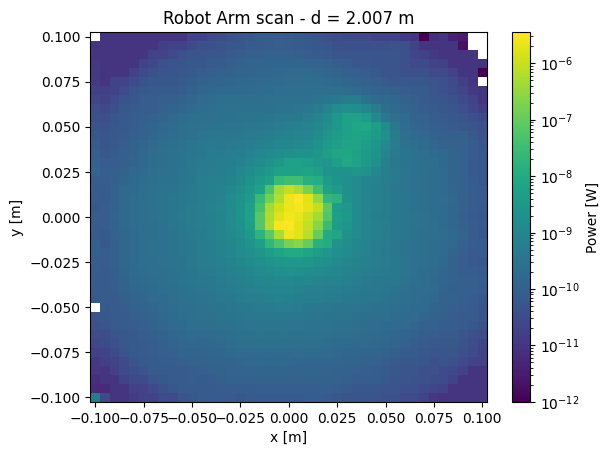

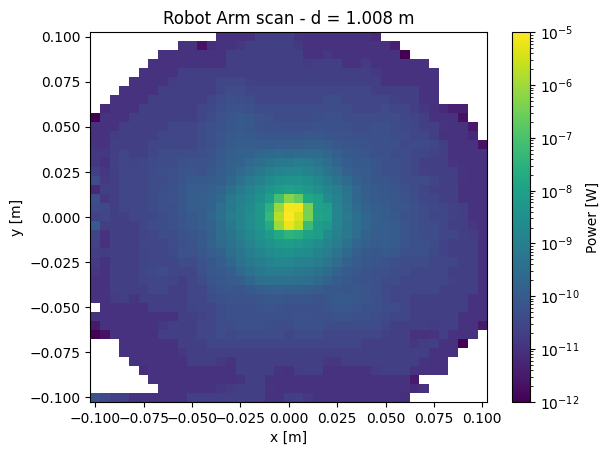

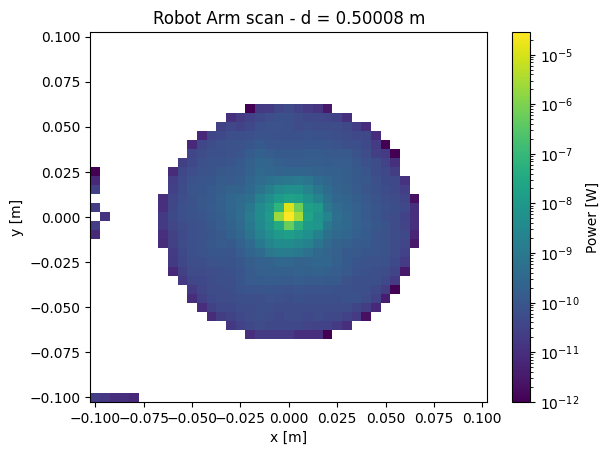

In [22]:
for i in files_no_diffuser.keys():
    filename = files_no_diffuser[i]
    fig, ax = plt.subplots()
    d=pd.read_csv(filename, comment = "#")
    h, x, y, image = ax.hist2d(d['xreal'],d['yreal'],bins= np.linspace(-0.10 - 0.005/2, 0.10 + 0.005/2,42),weights=d['power'],norm=mpl.colors.LogNorm())
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    plt.title(f"Robot Arm scan - {i}")
    plt.colorbar(image, ax = ax, label = "Power [W]")
    plt.show()

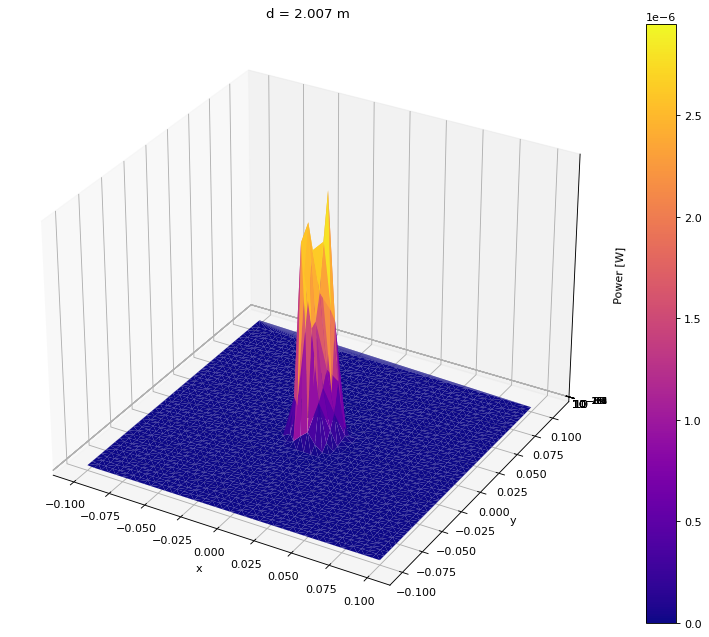

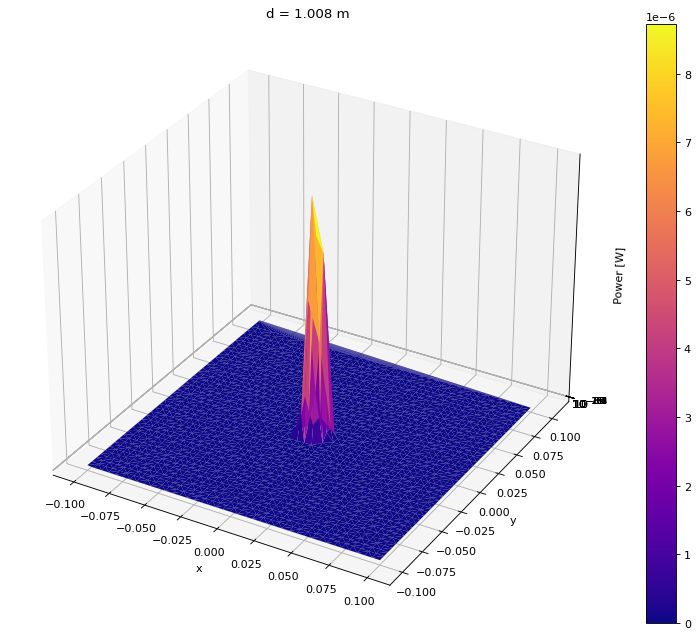

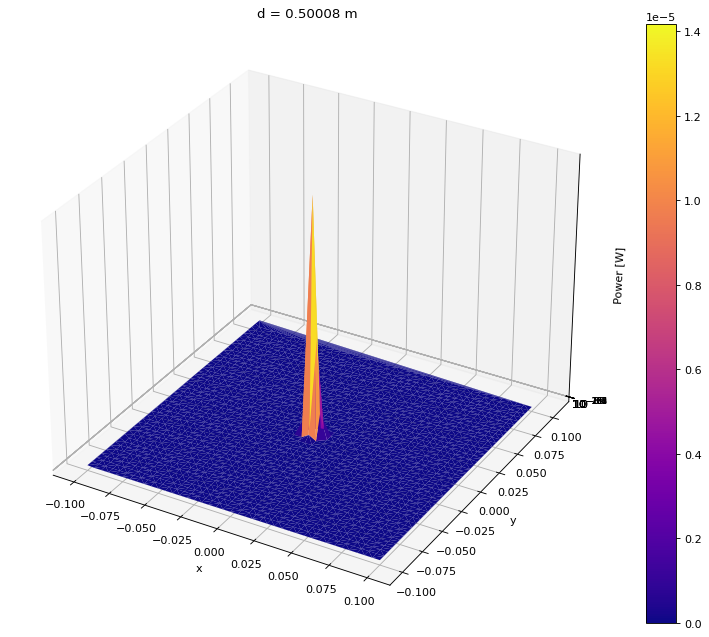

In [23]:

from matplotlib.ticker import MaxNLocator


for i in files_no_diffuser.keys():
    filename = files_no_diffuser[i]
    d=pd.read_csv(filename, comment = "#")

    fig = plt.figure(figsize=(10, 8), dpi=80)
    ax = fig.add_subplot(111, projection='3d')
        

    surf = ax.plot_trisurf(d["xreal"], d["yreal"], d["power"],cmap= "plasma",  linewidth=0, label = i)

    ax.xaxis.set_major_locator(MaxNLocator(10))
    ax.yaxis.set_major_locator(MaxNLocator(10))
    ax.zaxis.set_major_locator(MaxNLocator(10))
    plt.title(f"{i}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("Power [W]")
    ax.set_zscale("log")
    fig.tight_layout()
    fig.colorbar(surf)

plt.show()



Evaluate the correction factor between measurements @650 nm and 400 nm (PM Robot Arm)

In [24]:
# 1 m distance
file650 = "./d20221122/d20221122_114356_2dscan/d20221122_114356_2dscan.csv"
file400 = "./d20221202/d20221202_170918_2dscan/d20221202_170918_2dscan.csv"
#file400 = "./d20221201/d20221201_105310_2dscan/d20221201_105310_2dscan.csv"
# 2 m distance
#file400 = "./d20221205/d20221205_112708_2dscan/d20221205_112708_2dscan.csv"
#file650 = "./d20221122/d20221122_114356_2dscan/d20221122_114356_2dscan.csv"

In [25]:
d650 =pd.read_csv(file650, comment = "#")
d400 = pd.read_csv(file400, comment = "#")
print(d400)
#print(d650)
print(len(d400))
print(len(d650))
f = d400["power"]/d650["power"]



print(f)

                              x;y;ratio
-0       2;-0     2;5       537634409.0
         2;0;28   26446281          NaN
0;0      1;33     52941176          NaN
0;0;35   85987261 NaN               NaN
0        2;0      2;4       947368421.0
;;       NaN      NaN               NaN
;Mean;21 62775    NaN               NaN
7
733


KeyError: 'power'